In [1]:
import numpy as np
import matplotlib.pyplot as plt

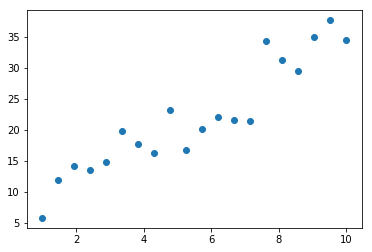

In [2]:
x = np.linspace(1,10,20)
y = 3*x + 5 + 3*np.random.randn(20)
plt.scatter(x,y)
plt.show()

In [10]:
# J is the cost function of θ0 and θ1
θ0_grid, θ1_grid = np.meshgrid(np.linspace(2,8,20),np.linspace(2,4,20))
θ0_ravel, θ1_ravel = np.ravel(θ0_grid), θ1_grid.ravel() 
θ = np.matrix(np.c_[θ0_ravel,θ1_ravel]) # this is a 400 X 2 matrix

X = np.concatenate((np.ones((1,20)),x.reshape(1,20)), axis = 0) # be careful of the dimensions
X = np.matrix(X) # X is a 2 by 20 matrix

h_set = θ*X # h_set is a 400 by 20 matrix 

J = []
for i in range(400):
    h = np.array(h_set[i,:]) #h =  θ0 + θ1*X, 
    j = 1/(2*len(x))*np.sum((h-y)**2) # cost fun for a given h which should be an array
    J.append(j)
J = np.array(J)

C:\David\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


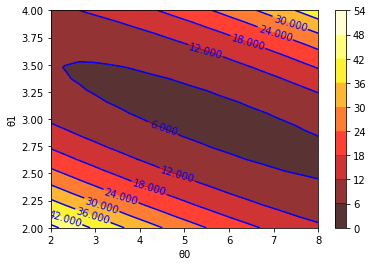

In [12]:
# plot the cost function

CF = plt.contourf(θ0_grid,θ1_grid, J.reshape(20,20), alpha = 0.8 , cmap = plt.cm.hot)
C = plt.contour(θ0_grid,θ1_grid,J.reshape(20,20),colors = 'b', linewidth = .5)
plt.clabel(C, inline = True, fontsize = 10)
plt.xlabel('θ0')
plt.ylabel('θ1')
plt.colorbar(CF)
plt.show()

In [33]:
# Gradient Descent

def CosFun(θ0, θ1): # compute the cost fun
    θ_matrix = np.matrix([θ0,θ1])
    h = np.array(θ_matrix*X)
    return 1/(2*len(x))*np.sum((h-y)**2) 

θ0, θ1 = 3, 2 # initial condition
δθ = 0.001 # to take the derivative
α = 0.01 # the learning rate
n_step = 1000 # the maximum step
θ_ans = []

for j in range(n_step):
    J_before = CosFun(θ0, θ1)
    J_δθ0 = CosFun((θ0+δθ), θ1)
    J_δθ1 = CosFun(θ0, (θ1+δθ))
    θ0 = θ0 - α*(J_δθ0-J_before)/δθ # sinmultaneously update θ0 and θ1
    θ1 = θ1 - α*(J_δθ1-J_before)/δθ # sinmultaneously update θ0 and θ1
    J_after = CosFun(θ0, θ1)
    if np.abs(J_after-J_before) < 0.001: # define the convergent condition
        print("the final step = {}".format(j+1))
        θ_ans += [θ0, θ1]
        print(θ_ans)
        break

the final step = 245
[4.181377930034611, 3.2008886092034032]


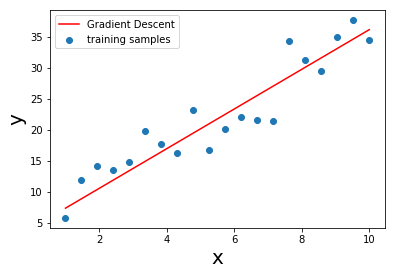

In [36]:
# plot the result:

plt.scatter(x,y, label = 'training samples')
plt.plot(x, (θ_ans[0]+θ_ans[1]*x), c = 'r', label = 'Gradient Descent')
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.legend()
plt.show()